In [1]:
import sys
sys.path.append('..')
import utils.matrix as matrix
import utils.matrix_plot as matrix_plot
%matplotlib inline


['/home/rxi2/ODbias/plot', '/home/rxi2/.conda/envs/rui/lib/python311.zip', '/home/rxi2/.conda/envs/rui/lib/python3.11', '/home/rxi2/.conda/envs/rui/lib/python3.11/lib-dynload', '', '/home/rxi2/.conda/envs/rui/lib/python3.11/site-packages', '..', '/home/rxi2/ODbias/plot/../utils']


In [5]:
# read data
bias_type = "base_rate" # base_rate/sample_size_bias/ under_representation_bias/mean_shift/variance_shift/obfuscation_bias
data_type = "scatter" #scatter / cluster
method = "DeepAE"

if bias_type == "sample_size_bias":
    axis_title = r'$\beta_s$'
elif bias_type == "under_representation_bias":
    axis_title = r'$\beta_u$'
elif bias_type == "variance_shift":
    axis_title = r'$\beta_v$'
elif bias_type == "mean shift":
    axis_title = r'$\beta_m$'
elif bias_type == "base_rate":
    axis_title = r'$\beta_b$'
else: 
    axis_title = r'$\beta_g$'

hparam_list, auroc = matrix.new_read_hparam(f'../../../result/hparam_value/{bias_type}/{data_type}/{method}.json')
x_axis, base_rate_a, base_rate_b, base_rate_whole, flag_rate_a, flag_rate_b, recall_a, recall_b, \
    tpr_whole, fpr_a, fpr_b, fpr_whole, ppr_a, ppr_b, ppr_whole, \
         flag_ratio, true_positive_ratio, fpr_ratio, ppr_ratio, auroc = matrix.new_read_data(f'../../../result/new_results/{bias_type}/{data_type}/{method}.json')

violin_df, violin_true = matrix.read_violin(f'../../../result/new_data/{bias_type}/{data_type}/{method}.json')

/home/rxi2/deep/fair_deep/fairness
../../../result/hparam_value/base_rate/scatter/DeepAE.json


/home/rxi2/deep/fair_deep/fairness/matrix.py:249: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  violin_true = pd.read_json(combined_json['violin_true'], orient='records')
/home/rxi2/deep/fair_deep/fairness/matrix.py:250: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  violin_df = pd.read_json(combined_json['violin_df'], orient='records')


In [15]:
print("Optimal hparam:", hparam_list)


Optimal hparam: [{'num_layer': 2, 'input_decay': 1.5, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}, {'num_layer': 2, 'input_decay': 1.5, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}, {'num_layer': 2, 'input_decay': 1.0, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}, {'num_layer': 2, 'input_decay': 1.0, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}, {'num_layer': 2, 'input_decay': 1.0, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}, {'num_layer': 2, 'input_decay': 1.0, 'epochs': 250, 'lr': 0.001, 'weight_decay': 1e-05, 'dropout': 0, 'threshold': 1}]


In [3]:
tpr_whole_mean = matrix.get_mean(tpr_whole)
fpr_whole_mean = matrix.get_mean(fpr_whole)
ppr_whole_mean = matrix.get_mean(ppr_whole)
auroc_mean = matrix.get_mean(auroc)
#matrix_plot.plot_whole(axis_title, beta_v, tpr_whole_mean, fpr_whole_mean, ppr_whole_mean, auroc_mean)
print(auroc_mean)

[0.9856893854748604, 0.9817276257380387, 0.983398422256978, 0.9851296296296297, 0.9831610909865758, 0.9793793876957586, 0.9714144381820361]


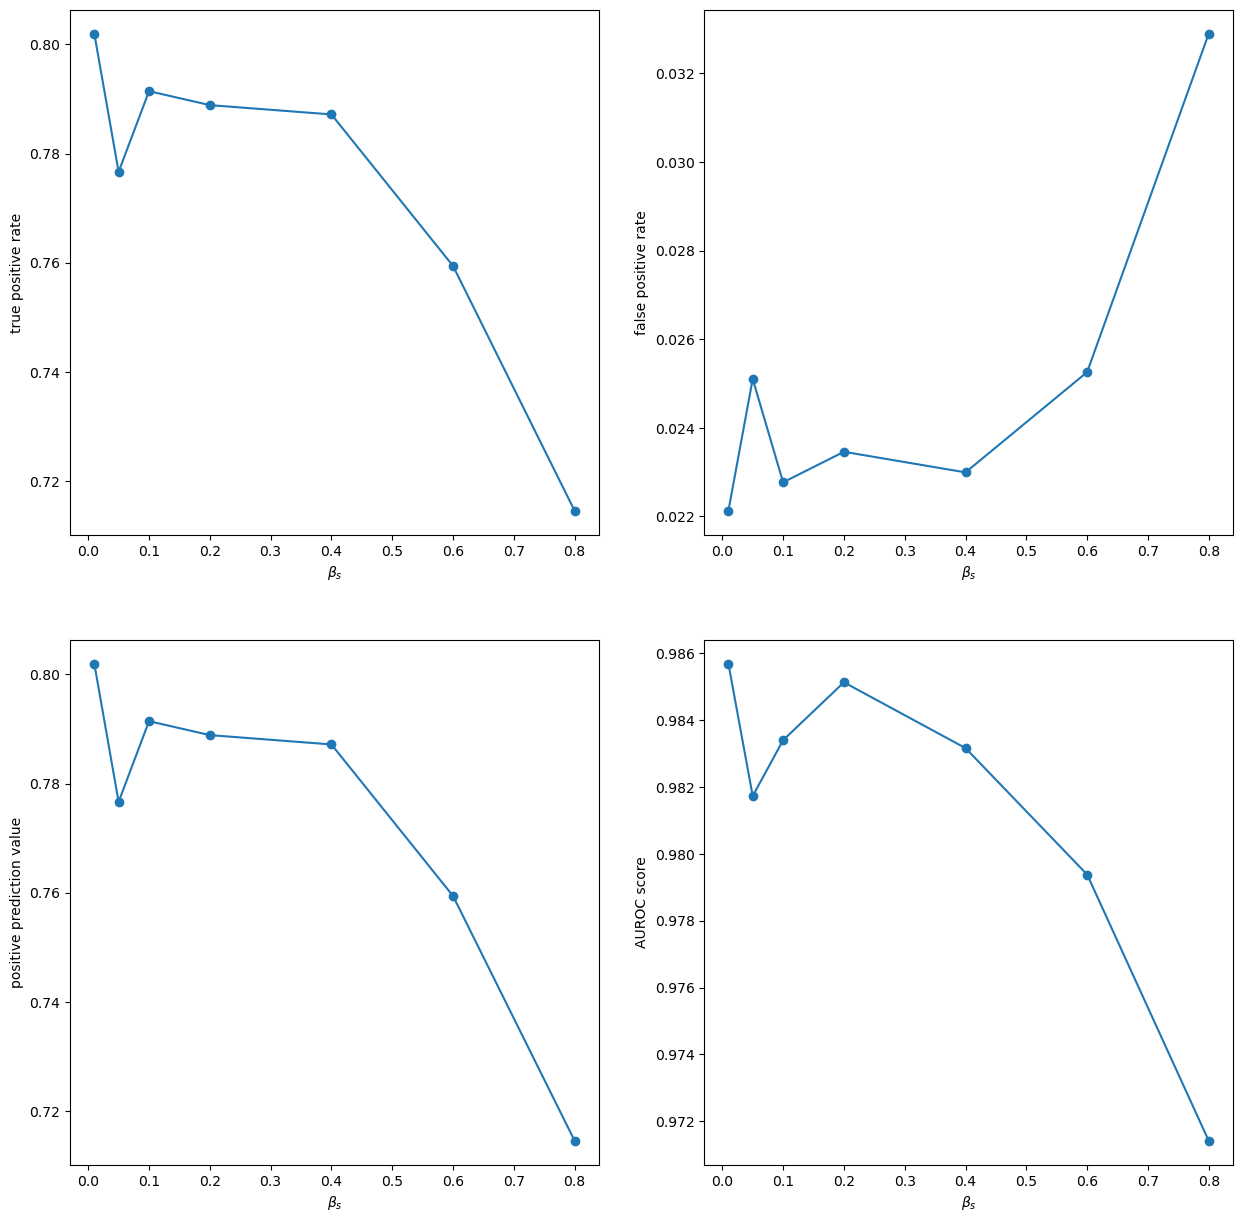

In [4]:
matrix_plot.plot_whole(axis_title, x_axis, tpr_whole_mean, fpr_whole_mean, ppr_whole_mean, auroc_mean)

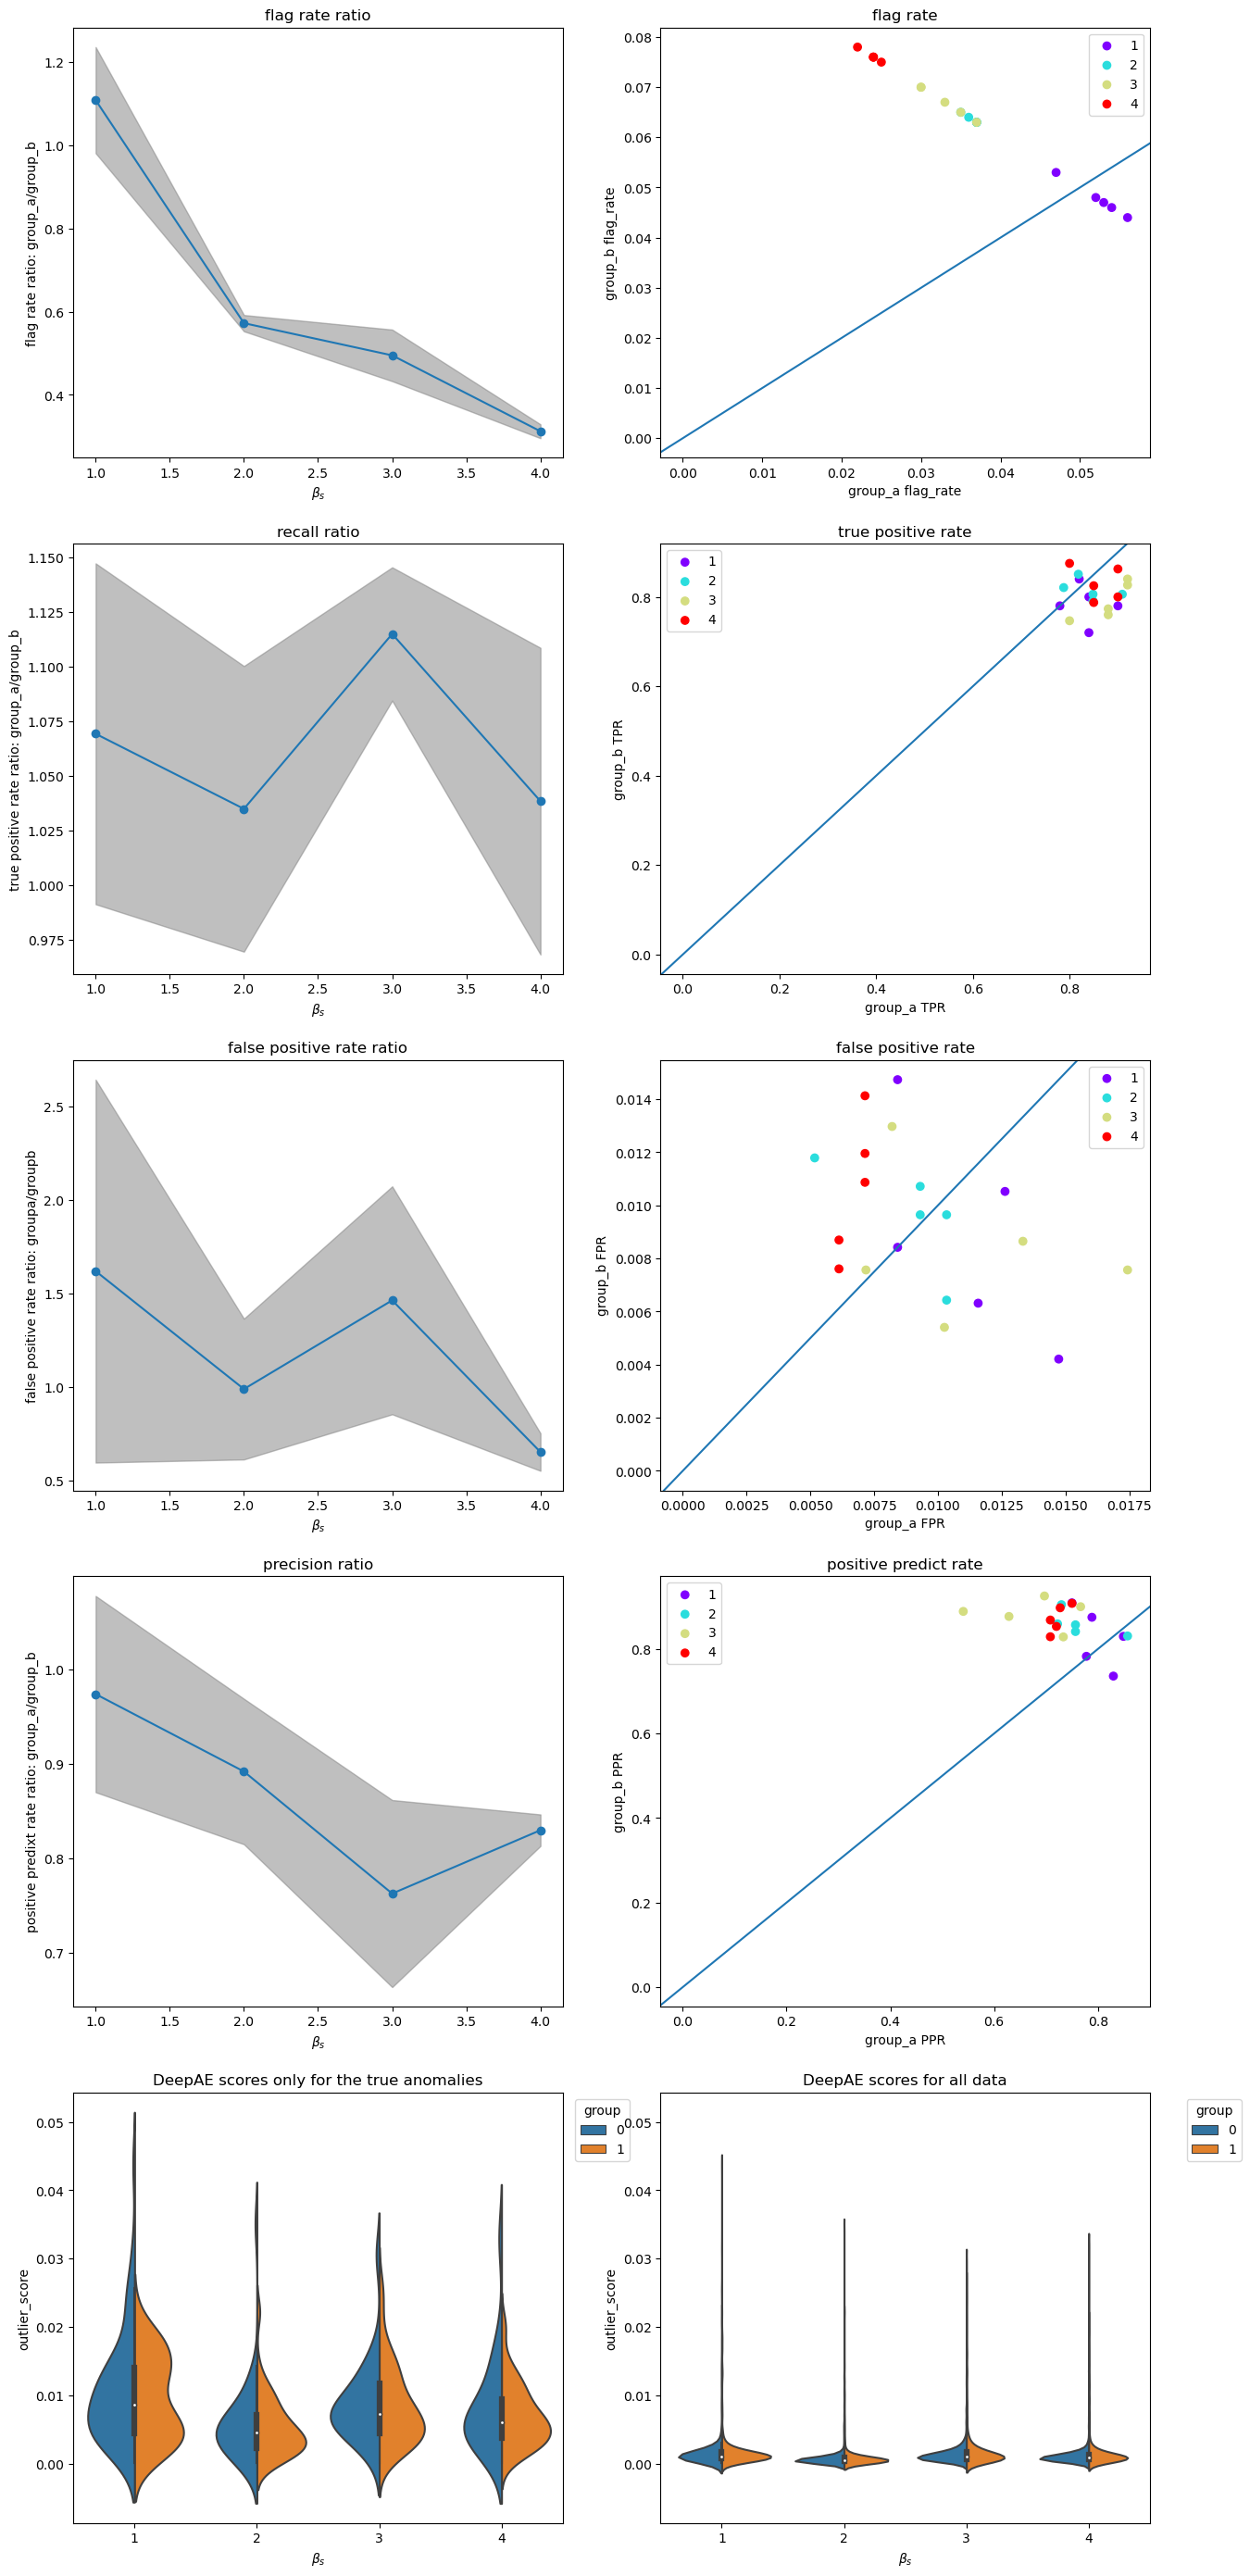

In [12]:
violin_title = "DeepAE"

flag_ratio_mean = matrix.get_mean(flag_ratio)
true_positive_mean = matrix.get_mean(true_positive_ratio)
fpr_ratio_mean = matrix.get_mean(fpr_ratio)
ppr_ratio_mean = matrix.get_mean(ppr_ratio) 

flag_ratio_var = matrix.get_var(flag_ratio_mean, flag_ratio)
true_positive_var = matrix.get_var(true_positive_mean, true_positive_ratio)
fpr_ratio_var = matrix.get_var(fpr_ratio_mean, fpr_ratio)
ppr_ratio_var = matrix.get_var(ppr_ratio_mean, ppr_ratio)

matrix_plot.plot(violin_title, axis_title, x_axis, violin_true, violin_df, flag_ratio_var, flag_ratio_mean, 
                    flag_rate_a, flag_rate_b, true_positive_var, true_positive_mean, 
                    recall_a, recall_b, fpr_ratio_var, fpr_ratio_mean, fpr_a, 
                    fpr_b, ppr_ratio_var, ppr_ratio_mean, ppr_a, ppr_b)

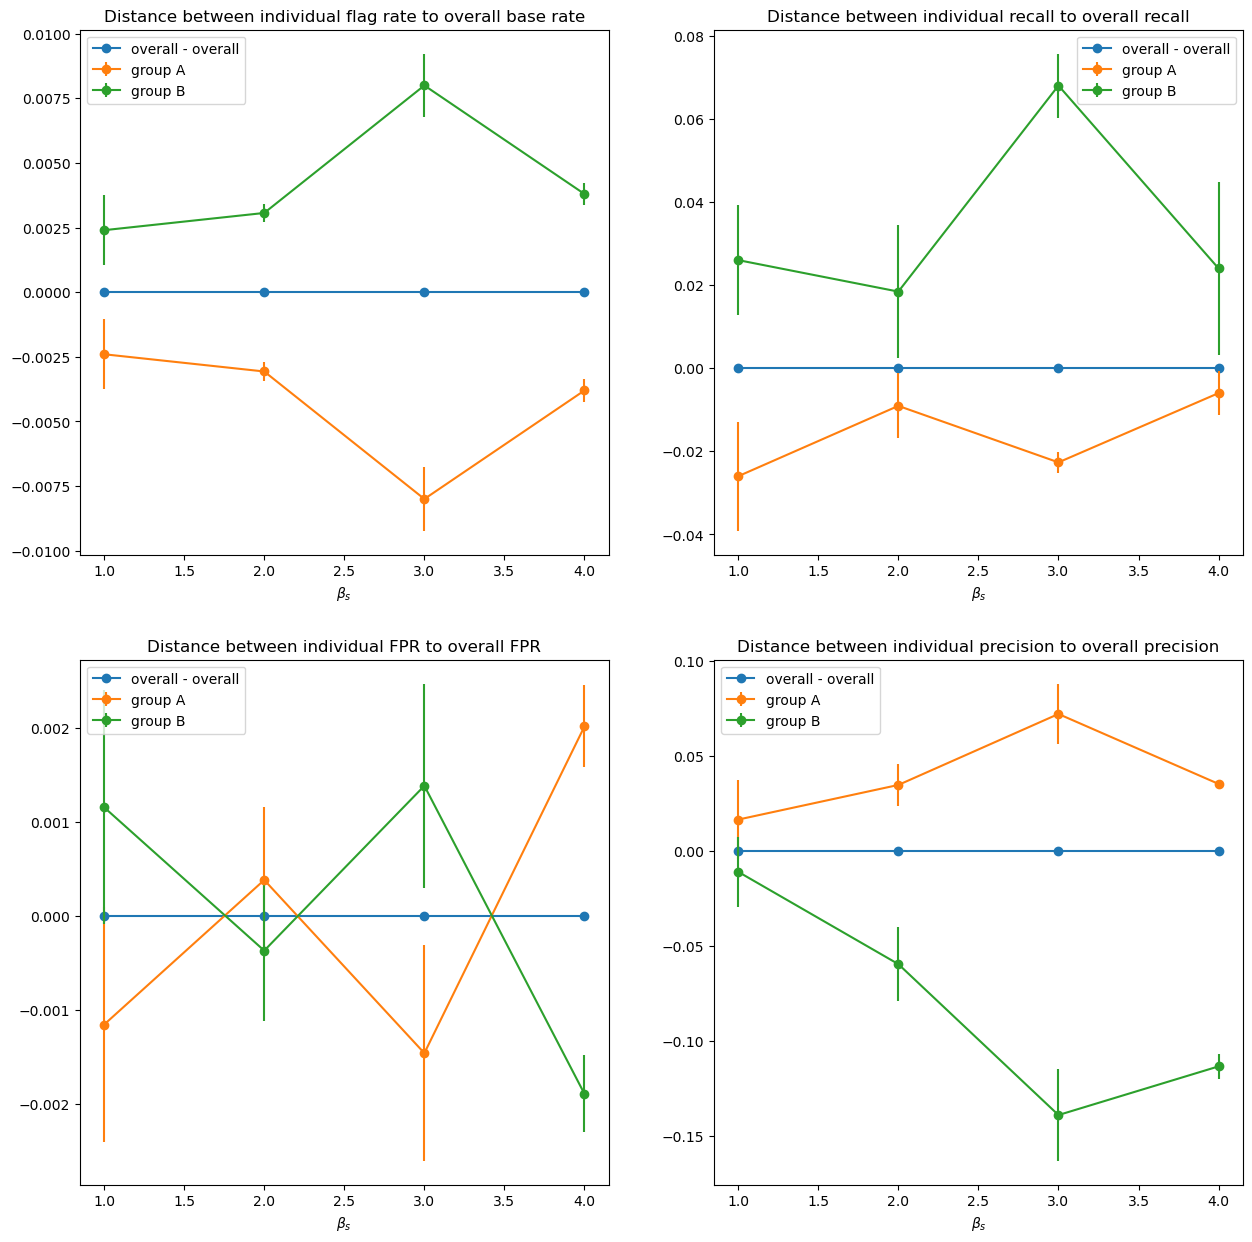

In [14]:
# matrix_plot.plot_diff(axis_title, x_axis, 
#                         flag_rate_a, flag_rate_b, base_rate_a, base_rate_b,
#                         recall_a, recall_b, tpr_whole, 
#                         fpr_a, fpr_b, fpr_whole, 
#                         ppr_a, ppr_b, ppr_whole)

# base rate
matrix_plot.plot_diff(axis_title, x_axis, 
                        flag_rate_b, flag_rate_a, base_rate_b, base_rate_a,
                        recall_b, recall_a, tpr_whole, 
                        fpr_b, fpr_a, fpr_whole, 
                        ppr_b, ppr_a, ppr_whole)

In [ ]:
# under representation

# import numpy as np
# base_rate_a = [0.1]*len(x_axis)
# base_rate_b = []
# for i in x_axis:
#     base_rate_b.append(100*(1-i)/1000)# base_rate_b = []
# print(base_rate_b)

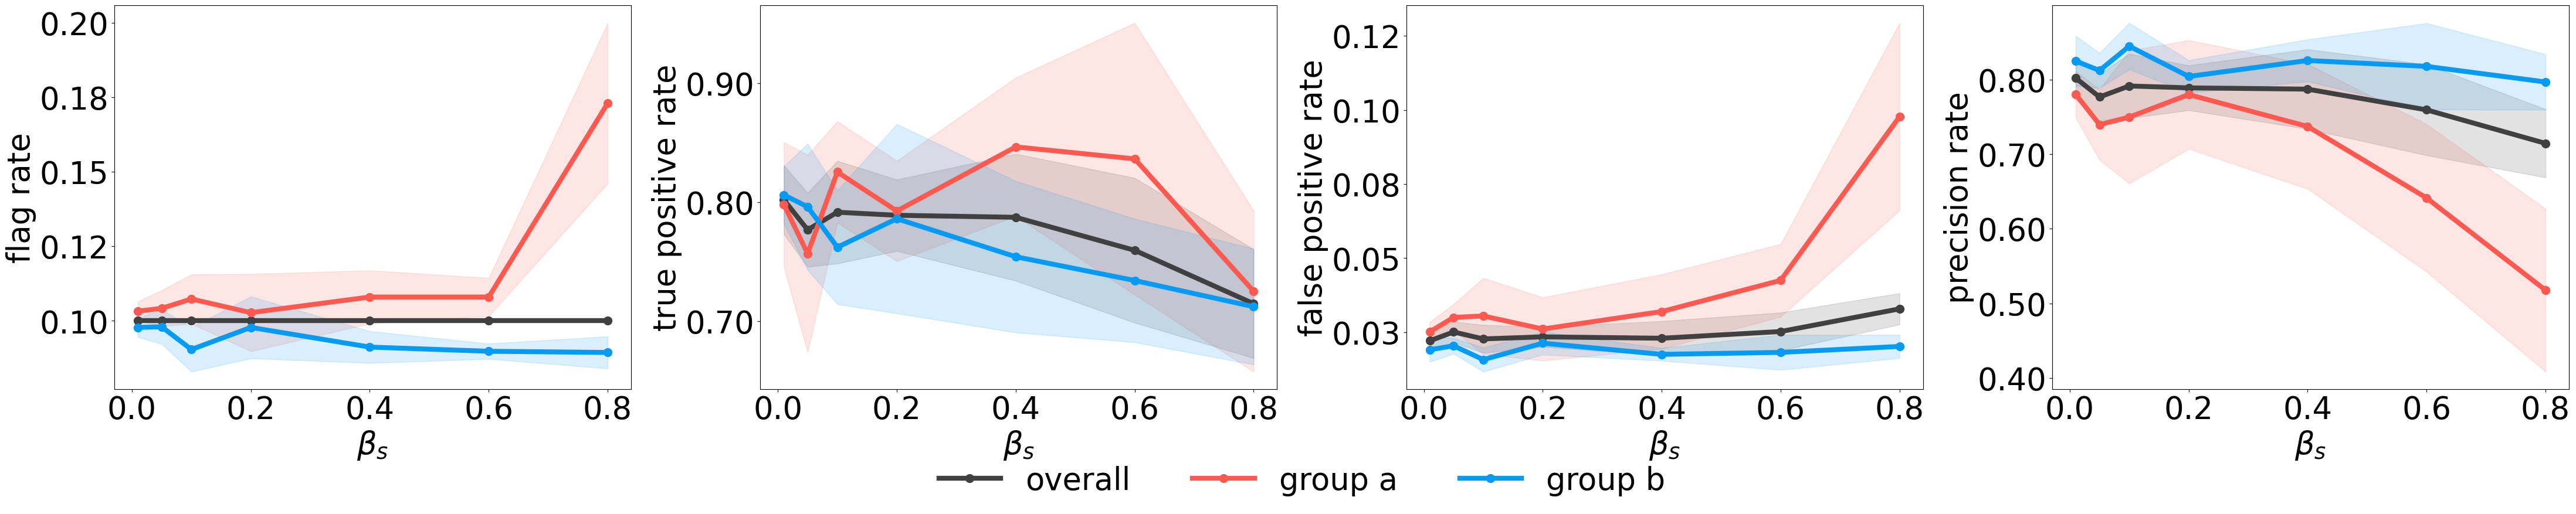

In [5]:
# matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_a, flag_rate_b,
#                         base_rate_a, base_rate_b, recall_a, recall_b, tpr_whole, 
#                         fpr_a, fpr_b, fpr_whole, ppr_a, ppr_b, ppr_whole)

# base rate
matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a, recall_b, recall_a, tpr_whole, fpr_b, fpr_a, fpr_whole, ppr_b, ppr_a, ppr_whole)

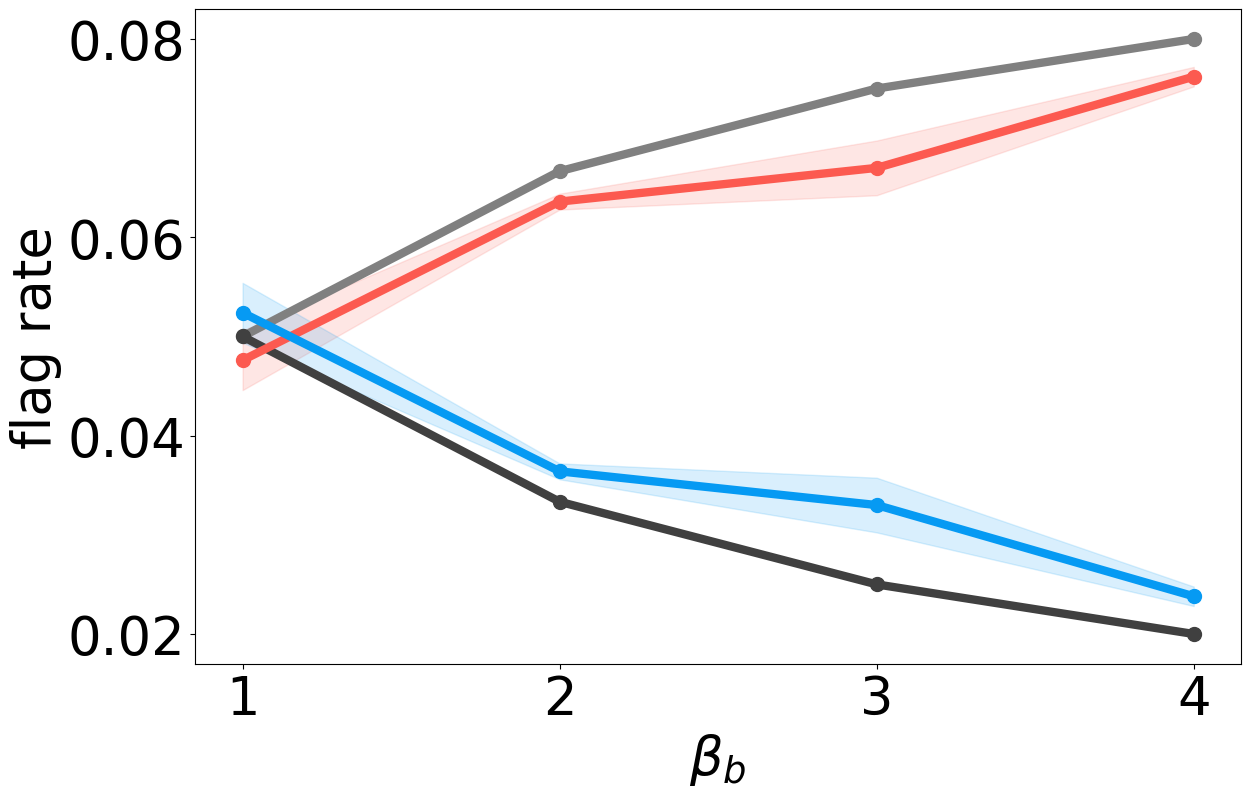

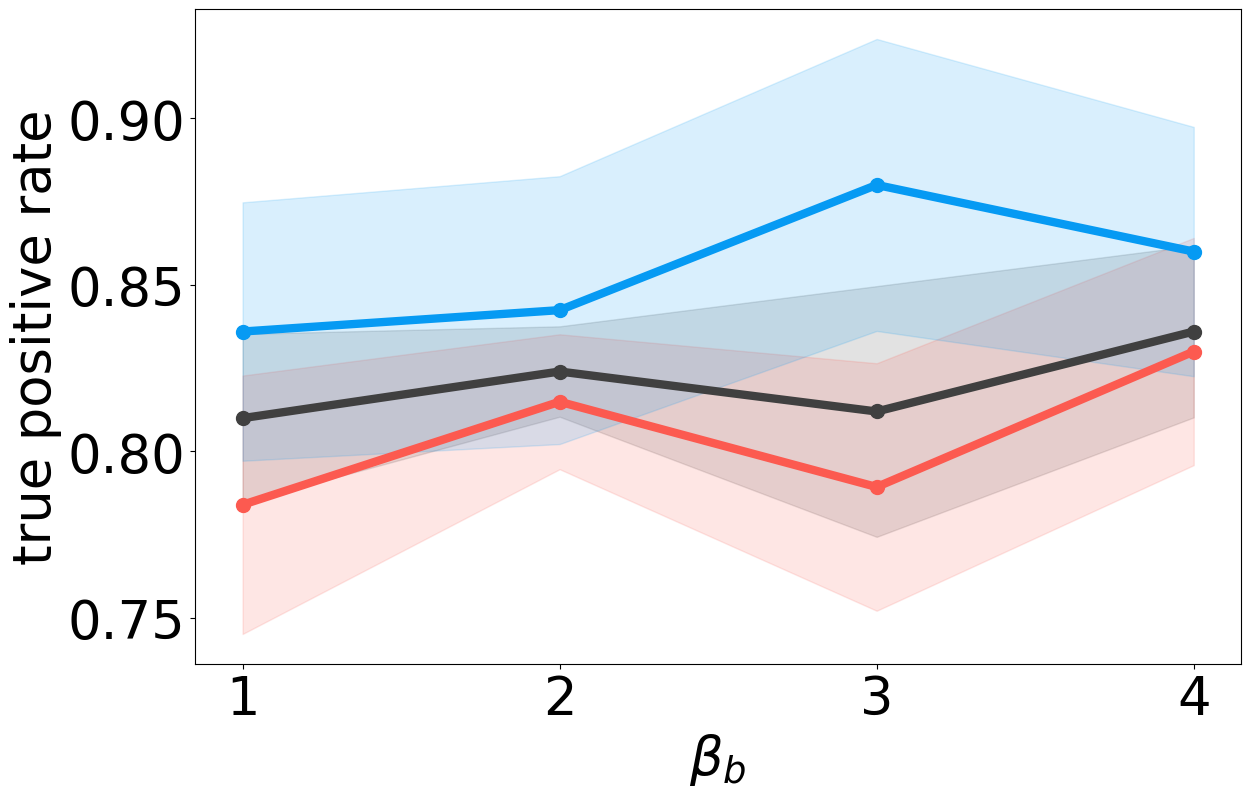

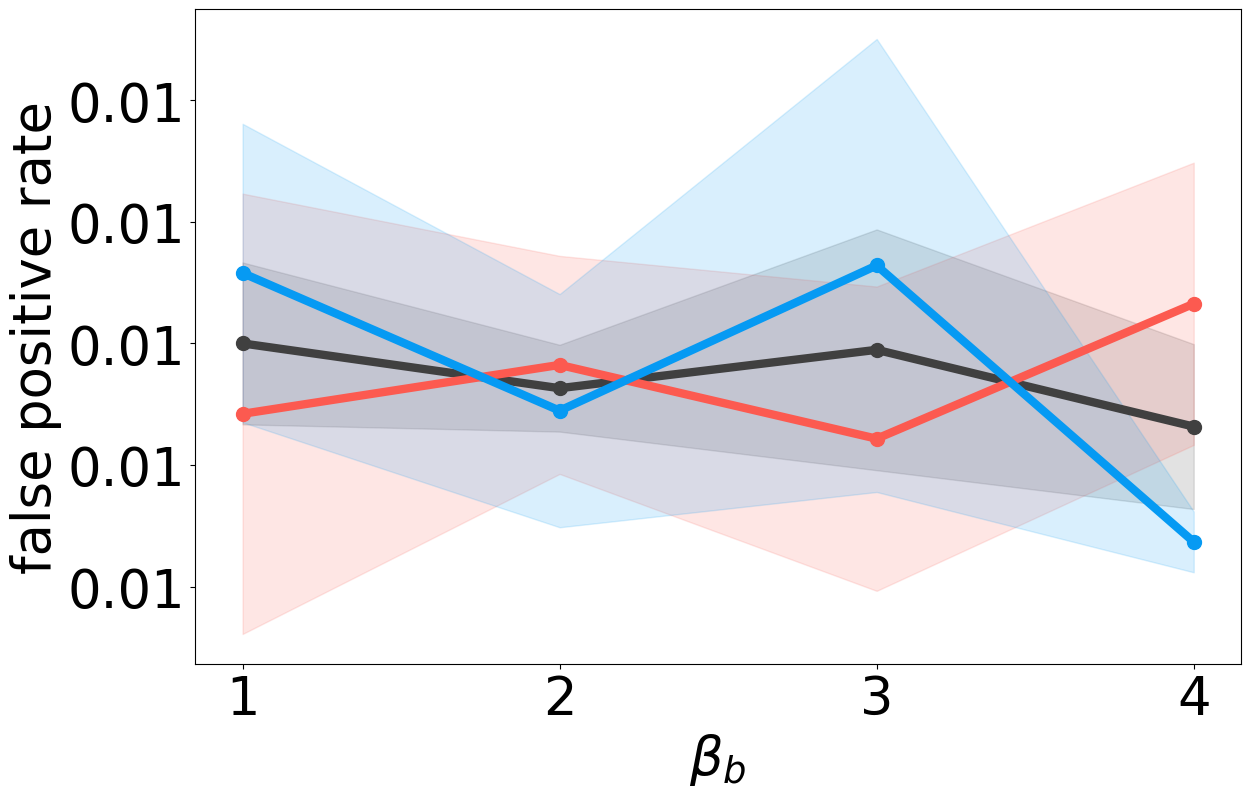

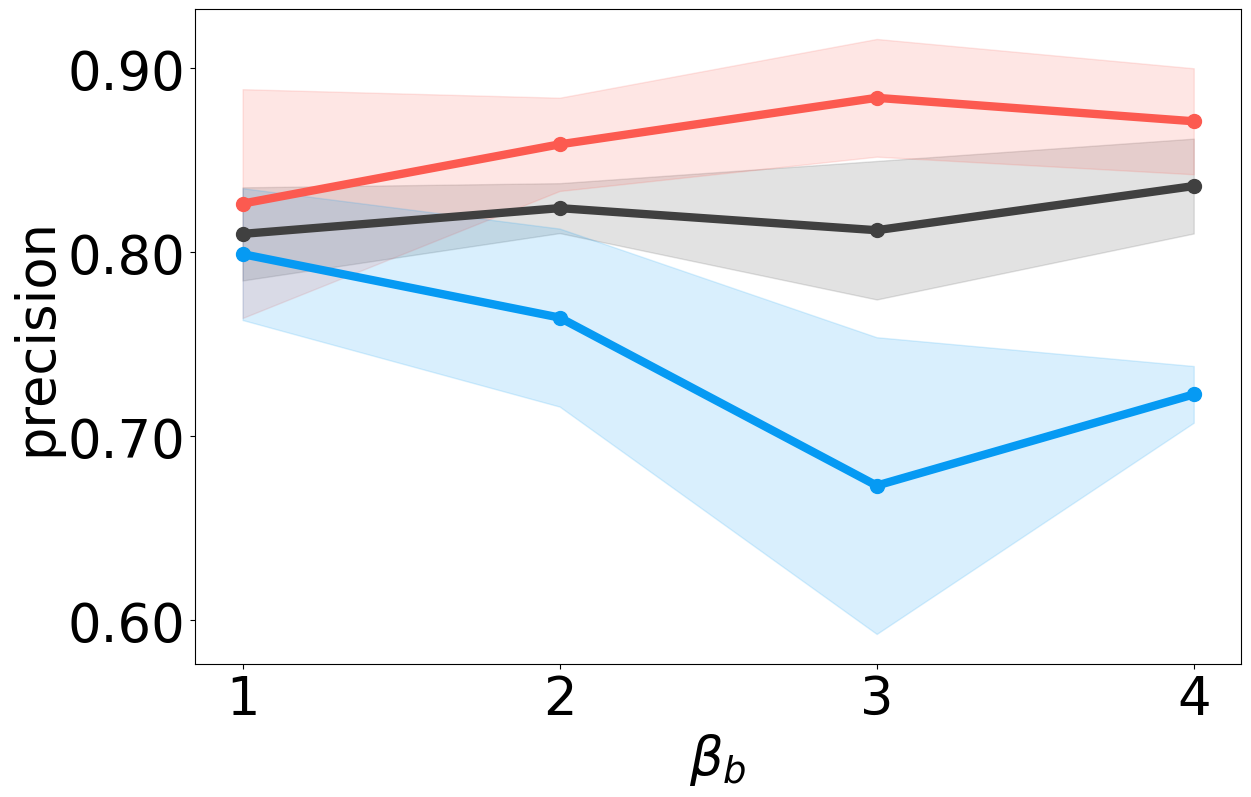

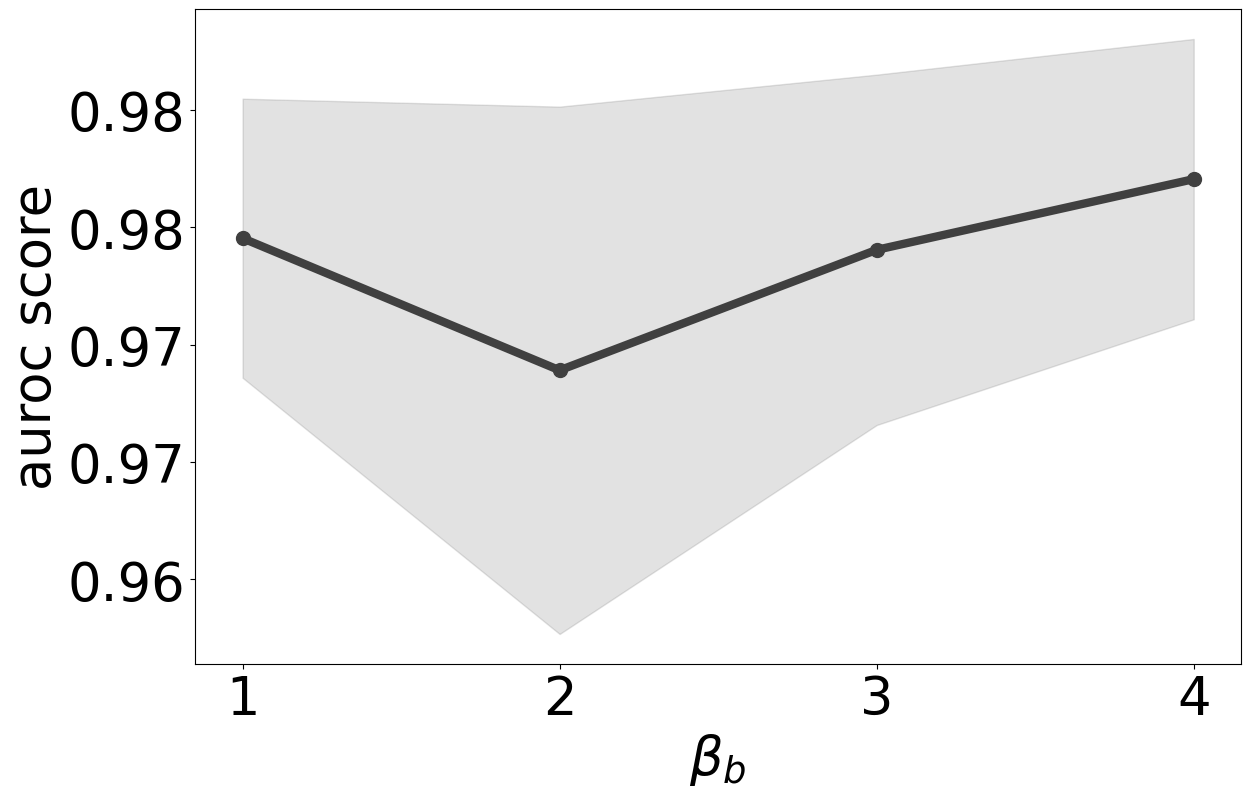

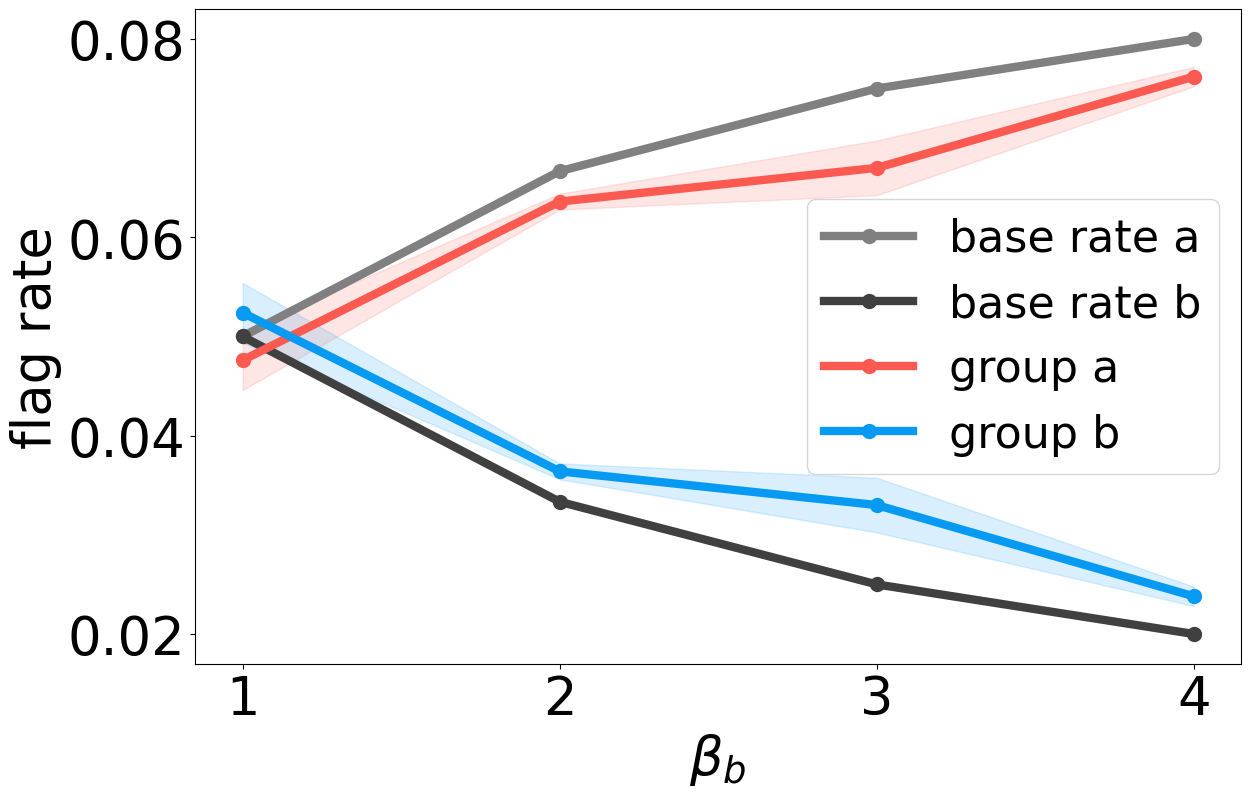

In [8]:
# matrix_plot.fr(axis_title, x_axis, flag_rate_a, flag_rate_b, base_rate_a, base_rate_b)
# matrix_plot.tpr(axis_title, x_axis, flag_rate_a, flag_rate_b, recall_a, recall_b, tpr_whole)
# matrix_plot.fpr(axis_title, x_axis, flag_rate_a, flag_rate_b, fpr_a, fpr_b, fpr_whole)
# matrix_plot.prec(axis_title, x_axis, flag_rate_a, flag_rate_b, ppr_a, ppr_b, ppr_whole)
# matrix_plot.auroc(auroc, x_axis, axis_title)
# matrix_plot.fr_legend(axis_title, x_axis, flag_rate_a, flag_rate_b, base_rate_a, base_rate_b)

# base rate
matrix_plot.fr(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a)
matrix_plot.tpr(axis_title, x_axis, flag_rate_b, flag_rate_a, recall_b, recall_a, tpr_whole)
matrix_plot.fpr(axis_title, x_axis, flag_rate_b, flag_rate_a, fpr_b, fpr_a, fpr_whole)
matrix_plot.prec(axis_title, x_axis, flag_rate_b, flag_rate_a, ppr_b, ppr_a, ppr_whole)
matrix_plot.auroc(auroc, x_axis, axis_title)
matrix_plot.fr_legend(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a)




In [ ]:
# prop_b = prop_b = list(range(1,5))
# beta_v = [ 0.01, 0.05, 0.10, 0.2, 0.4,  0.6, 0.8]
# beta_m = [0, 2, 4, 6, 8]
# beta_v = [0, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6]
# beta_v =  [0, 0.05, 0.1, 0.2, 0.4, 0.7, 1, 1.5, 2, 2.5, 3] # variance shift add
#beta_v = [0, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 3]
tpr_whole_mean = matrix.get_mean(tpr_whole)
fpr_whole_mean = matrix.get_mean(fpr_whole)
ppr_whole_mean = matrix.get_mean(ppr_whole)
auroc_mean = matrix.get_mean(auroc)
#matrix_plot.plot_whole(axis_title, beta_v, tpr_whole_mean, fpr_whole_mean, ppr_whole_mean, auroc_mean)
print(auroc_mean)

[0.98424, 0.9839611111111111, 0.98443, 0.9851572222222222, 0.9834644444444445, 0.9844505555555555, 0.9837716666666667]
